In [2]:
#Basic Packages and Data Visualization
import pandas as pd, numpy as np, scipy.stats as sci
import matplotlib.pyplot as plt, matplotlib.gridspec as grid, seaborn as sns
import string, re, nltk
#Natural Language Processing
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
#Feature Engineering
from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_is_fitted
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import log_loss
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

lem = WordNetLemmatizer()
tokenizer = TweetTokenizer()
english_stopwords = set(stopwords.words("english"))

In [3]:
train = pd.read_csv("C:\\SpringBoard\\CapstoneOne\\RedditSen.csv", encoding='utf-8')
train.head(10)

,Unnamed: 0,comment,positive,negative,compund,positive_comment,negative_comment,neutral_comment
0,0,"""You must post a clear and direct question in ...",0.090,0.052,0.1531,1,0,0
1,1,I have learned English.,0.000,0.000,0.0000,0,0,1
2,2,How to bunny hop,0.000,0.000,0.0000,0,0,1
3,3,"""You laugh, but have you ever realized you wal...",0.099,0.000,0.3182,1,0,0
4,4,After getting shot I can heal myself by drinki...,0.189,0.000,0.2732,1,0,0
5,5,I just hide in a corner until the heartbeat so...,0.000,0.337,-0.6808,0,1,0
6,6,"""How did you know that's how I deal with all m...",0.000,0.184,-0.4019,0,1,0
7,7,Mario Kart Wii taught me how to drive,0.000,0.000,0.0000,0,0,1
8,8,Drivers ed teacher: “WHAT ARE YOU DOING!? STRA...,0.281,0.000,0.5437,1,0,0
9,9,While throwing bananas,0.000,0.000,0.0000,0,0,1


In [4]:
null_check=train.isnull().sum()
null_check
train["comment"].fillna("unknown",inplace=True)
null_check

Unnamed: 0            0
comment             924
positive              0
negative              0
compund               0
positive_comment      0
negative_comment      0
neutral_comment       0
dtype: int64

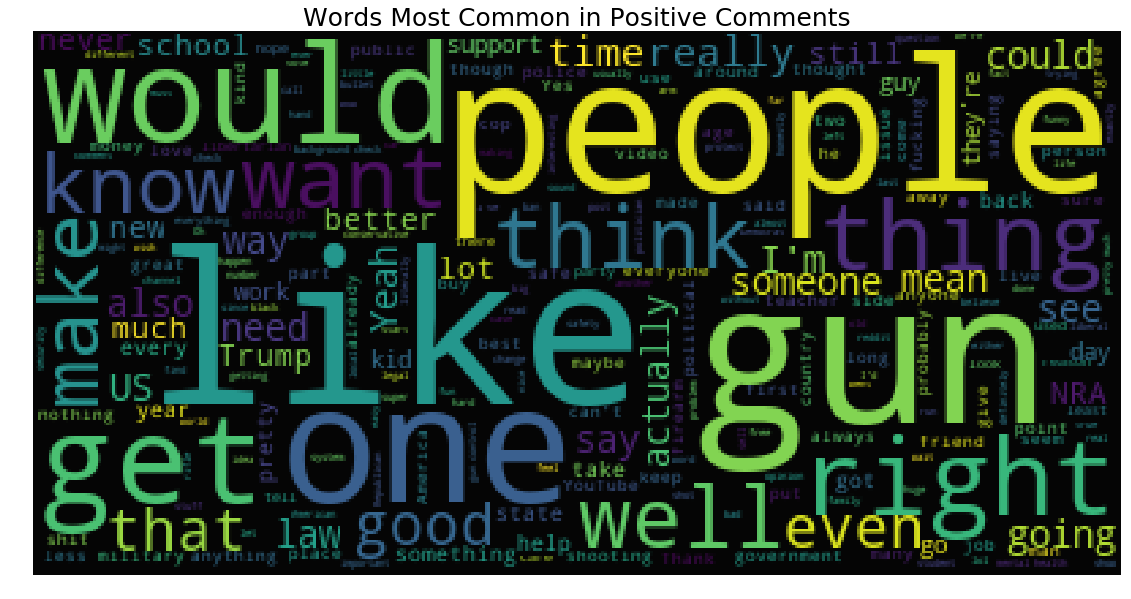

In [10]:
#Word Cloud Positive Comments
subset = train[train.positive_comment==True]
text=subset.comment.values
wc= WordCloud(background_color="black",max_words=2000,stopwords=english_stopwords)
wc.generate(" ".join(text))
plt.figure(figsize=(20,10))
plt.axis("off")
plt.title("Words Most Common in Positive Comments", fontsize=25)
plt.imshow(wc.recolor(colormap='viridis',random_state=17),alpha=.98)
plt.show()

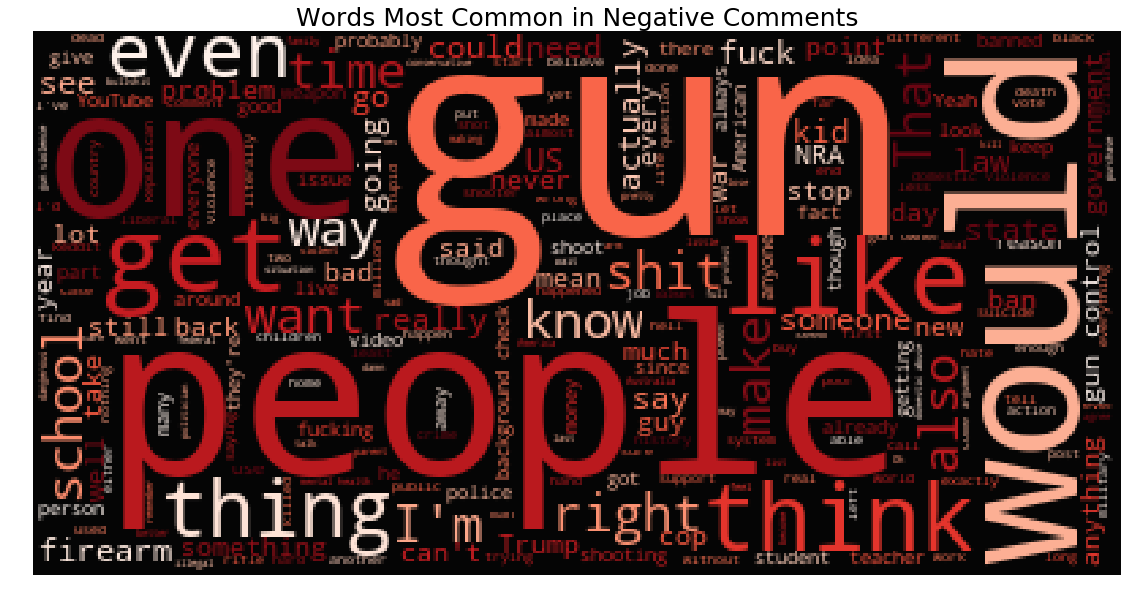

In [6]:
#Word Cloud Negative Comments
subset = train[train.negative_comment==True]
text=subset.comment.values
wc= WordCloud(background_color="black",max_words=2000,stopwords=english_stopwords)
wc.generate(" ".join(text))
plt.figure(figsize=(20,10))
plt.axis("off")
plt.title("Words Most Common in Negative Comments", fontsize=25)
plt.imshow(wc.recolor(colormap='Reds',random_state=17),alpha=.98)
plt.show()

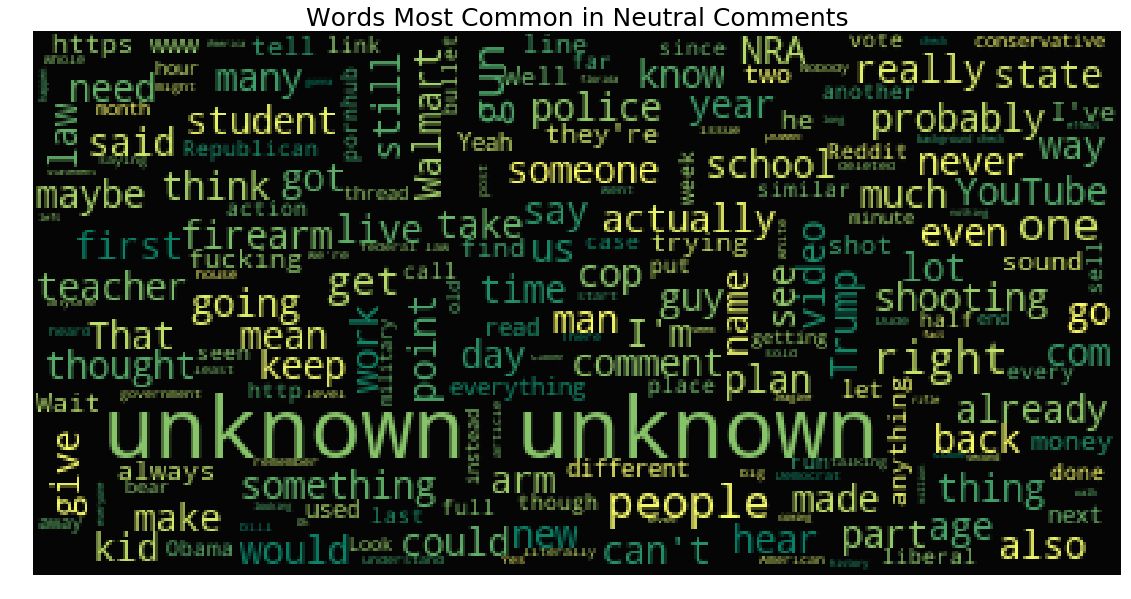

In [9]:
#Word Cloud Neutral Comments
subset = train[train.neutral_comment==True]
text=subset.comment.values
wc= WordCloud(background_color="black",max_words=2000, stopwords=english_stopwords)
wc.generate(" ".join(text))
plt.figure(figsize=(20,10))
plt.axis("off")
plt.title("Words Most Common in Neutral Comments", fontsize=25)
plt.imshow(wc.recolor(colormap='summer',random_state=17),alpha=.98)
plt.show()